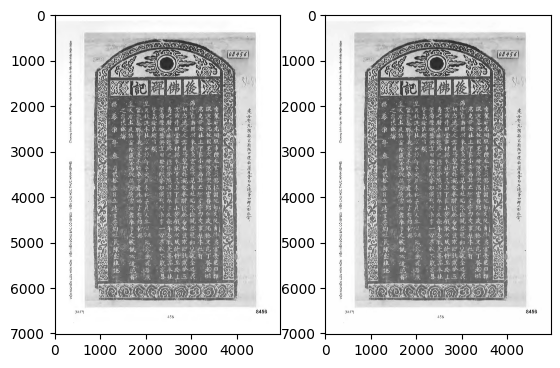

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread("../png/T09_08456.png")
dst = cv.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

from skimage.restoration import (
    denoise_tv_chambolle,
    denoise_bilateral,
    denoise_wavelet,
    estimate_sigma,
)
from skimage import data, img_as_float
from skimage.util import random_noise


# original = img_as_float(data.chelsea()[100:250, 50:300])

# sigma = 0.155
# noisy = random_noise(original, var=sigma**2)
noisy = img
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5), sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, channel_axis=-1, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

ax[0, 0].imshow(noisy)
ax[0, 0].axis("off")
ax[0, 0].set_title("Noisy")
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, channel_axis=-1))
ax[0, 1].axis("off")
ax[0, 1].set_title("TV")
ax[0, 2].imshow(
    denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15, channel_axis=-1)
)
ax[0, 2].axis("off")
ax[0, 2].set_title("Bilateral")
ax[0, 3].imshow(denoise_wavelet(noisy, channel_axis=-1, rescale_sigma=True))
ax[0, 3].axis("off")
ax[0, 3].set_title("Wavelet denoising")

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, channel_axis=-1))
ax[1, 1].axis("off")
ax[1, 1].set_title("(more) TV")
ax[1, 2].imshow(
    denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15, channel_axis=-1)
)
ax[1, 2].axis("off")
ax[1, 2].set_title("(more) Bilateral")
ax[1, 3].imshow(
    denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True, rescale_sigma=True)
)
ax[1, 3].axis("off")
ax[1, 3].set_title("Wavelet denoising\nin YCbCr colorspace")
ax[1, 0].imshow(img)
ax[1, 0].axis("off")
ax[1, 0].set_title("Original")

fig.tight_layout()

plt.show()

Estimated Gaussian noise standard deviation = 1.6430885280193388e-16
